In [ ]:
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from wordcloud import WordCloud
import re
import string

In [ ]:
tweets = pd.read_csv('train.csv')

In [ ]:
df = tweets.copy()

#Data processing

In [ ]:
df.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# #clean text
# def clean_text(text):
#     text = text.lower()
#     text = text.translate(str.maketrans('', '', string.punctuation))
#     stop_words = set(stopwords.words('english'))
#     text = ' '.join([word for word in text.split() if word not in stop_words])
#     lemmatizer = WordNetLemmatizer()
#     text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
#     return text

In [ ]:
def clean_text_with_lemmatization_and_url_removal(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    text = text.lower()
    # Remove special characters
    text = re.sub(r'[^\w\s]', '', text)

    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    lemmatizer = WordNetLemmatizer()

    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

In [ ]:
# Apply cleaning function to the 'Text' column
df['text'] = df['text'].apply(clean_text)

In [ ]:
df.drop("keyword", axis=1, inplace=True)

In [ ]:
df.drop("location", axis=1, inplace=True)

In [ ]:
df.tail()

,id,text,target
7608,10869,two giant crane holding bridge collapse nearby...,1
7609,10870,ariaahrary thetawniest control wild fire calif...,1
7610,10871,m194 0104 utc5km volcano hawaii httptcozdtoyd8ebj,1
7611,10872,police investigating ebike collided car little...,1
7612,10873,latest home razed northern california wildfire...,1


#Bag of Words model using CountVectorizer

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])
y = df['target']

#data Visualizing

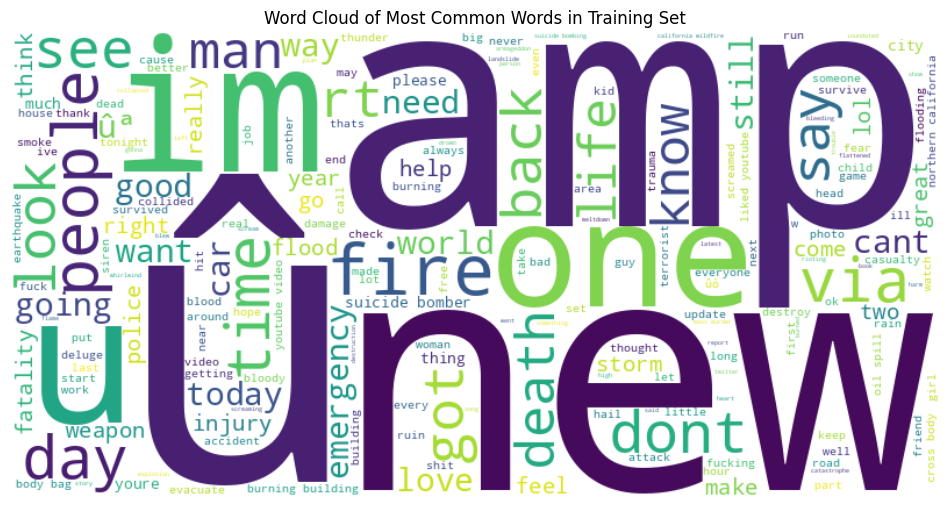

In [ ]:
text_combined = " ".join(df['text'])

plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, random_state=42, background_color='white').generate(text_combined)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words in Training Set')
plt.show()

#Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier


In [ ]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = classifier.predict(X_test)


##Evaluation

In [ ]:
# classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       874
           1       0.78      0.73      0.75       649

    accuracy                           0.80      1523
   macro avg       0.79      0.79      0.79      1523
weighted avg       0.80      0.80      0.79      1523



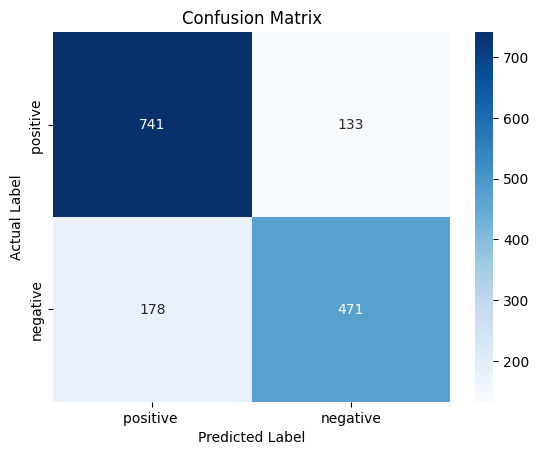

In [ ]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['positive ', 'negative'], yticklabels=['positive ', 'negative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

#LOGISTIC REGRESSION

In [ ]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

##Evaluation

In [ ]:
# classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       874
           1       0.79      0.70      0.74       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.79      1523
weighted avg       0.79      0.79      0.79      1523



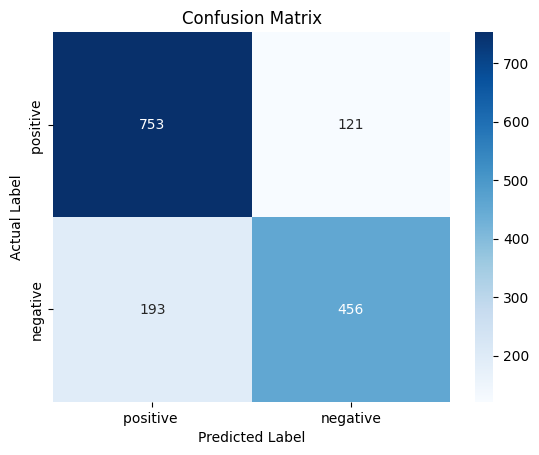

In [ ]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['positive ', 'negative'], yticklabels=['positive ', 'negative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

#Random forest

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_test)


##Evaluation

In [ ]:
# classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       874
           1       0.82      0.64      0.72       649

    accuracy                           0.79      1523
   macro avg       0.79      0.77      0.77      1523
weighted avg       0.79      0.79      0.78      1523



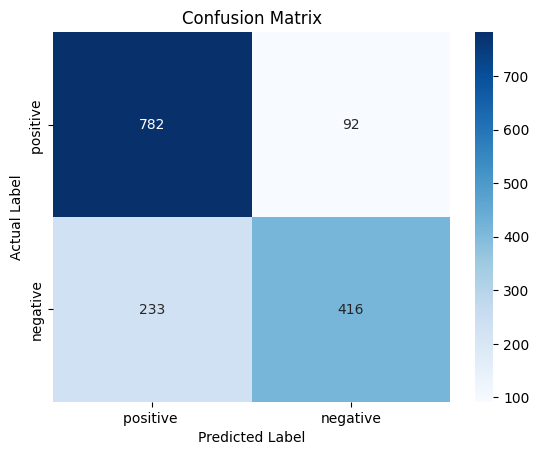

In [ ]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['positive ', 'negative'], yticklabels=['positive ', 'negative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

#KNN classifier

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn_classifier.predict(X_test)

##Evaluation

In [ ]:
# classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.96      0.78       874
           1       0.86      0.33      0.48       649

    accuracy                           0.69      1523
   macro avg       0.76      0.64      0.63      1523
weighted avg       0.74      0.69      0.65      1523



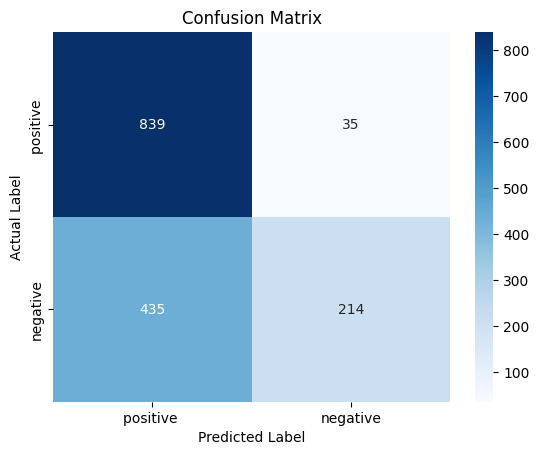

In [ ]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['positive ', 'negative'], yticklabels=['positive ', 'negative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

# XGBoost classifier


In [ ]:
# xgb_classifier = XGBClassifier(
#     learning_rate=0.2,  # Adjust the learning rate
#     n_estimators=200,  # Adjust the number of trees (estimators)
#     max_depth=5,  # Adjust the maximum depth of each tree
#     min_child_weight=1,  # Adjust the minimum sum of instance weight needed in a child
#     gamma=0,  # Adjust the minimum loss reduction required to make a further partition on a leaf node
#     subsample=0.5,  # Adjust the subsample ratio of the training instances
#     colsample_bytree=0.8,  # Adjust the subsample ratio of columns when constructing each tree
#     objective='binary:logistic',  # Specify the learning task and objective
#     random_state=42
# )

In [ ]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xgb_classifier.predict(X_test)


## Evaluation


In [ ]:
# Classification report
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       874
           1       0.82      0.64      0.72       649

    accuracy                           0.79      1523
   macro avg       0.80      0.77      0.77      1523
weighted avg       0.79      0.79      0.78      1523



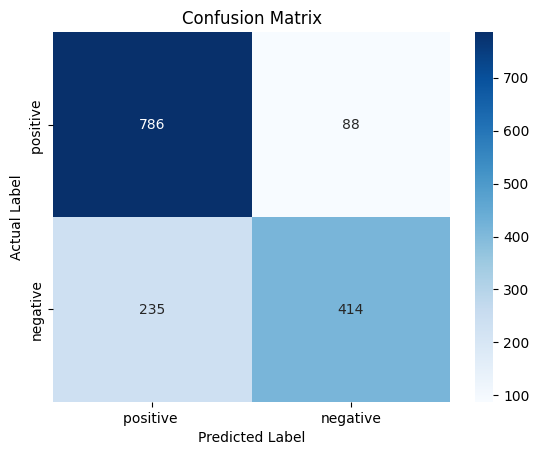

In [ ]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['positive ', 'negative'],
            yticklabels=['positive ', 'negative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

#**Conclusion**

In conclusion, Twitter has emerged as a crucial communication channel during emergencies, facilitated by the widespread use of smartphones that empower individuals to report real-time observations. This trend has garnered increased attention from various entities, including disaster relief organizations and news agencies, prompting interest in automated Twitter monitoring programs.

However, discerning whether a tweet truly signifies an impending disaster poses a challenge. To address this, I undertook the task of training different models for classifying disaster-related tweets. The results of my training efforts revealed that Naive Bayes stands out as the most effective model. The simplicity of the dataset played a pivotal role in this outcome. For straightforward problems, opting for a simple model like Naive Bayes proves to be an efficient and effective solution.